# $$Telco-Customer-Churn$$

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**
>
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## we want to answer some questions such as :
### what kind of people left within the last month?
### what is the reason for lefting the company within the last month?

<a id='wrangling'></a>
## Data Wrangling


**let's read the data and take some intuition about it**

In [1]:
# import the important libraries
import pandas as pd     # for dataframe
import numpy as np      # for arraies
import matplotlib.pyplot as plt  # for visualization 
%matplotlib inline
import seaborn as sns           # for visualization 

In [4]:
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
telco.isna().sum() # number of missing values for each columns

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**we can see that the data don't have missing value**

In [9]:
telco.describe() # to know some statistical information about the numerical data

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
telco.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

**Now we can say about this data:
We have two genders of clients. Some clients are still dependent, others are independent. and some have a partner.
Customers who have available phone service have some features and advantages.
The company also provides 4 payment methods
['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)']**

<a id='eda'></a>
## Exploratory Data Analysis


### now let's make  Exploratory Data Analysis!

In [15]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## what is the percentage for each gender which left the company?

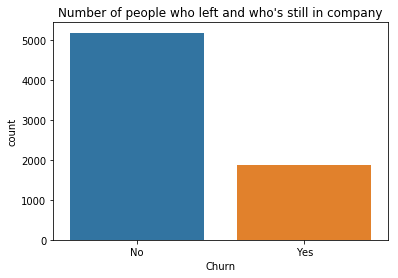

In [18]:
sns.countplot(telco.Churn)
plt.title("Number of people who left and who's still in company")
plt.show()

In [19]:
telco.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

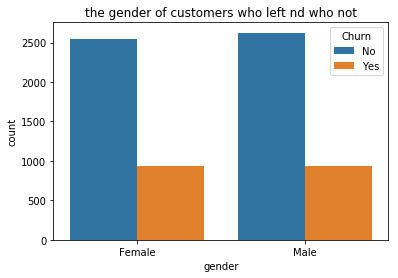

In [61]:
sns.countplot(telco.gender,hue=telco.Churn)
plt.title('the gender of customers who left nd who not')
plt.show()

In [23]:
female_left = telco.query("gender == 'Female' and Churn == 'Yes'")

In [29]:
female_left.shape

(939, 21)

In [24]:
male_left = telco.query("gender == 'Male' and Churn == 'Yes'")

In [27]:
male_left.shape

(930, 21)

In [30]:
print('the percentage of female who left is {}%'.format((939/1869)*100))

the percentage of female who left is 50.24077046548957%


In [31]:
print('the percentage of male who left is {}%'.format((930/1869)*100))

the percentage of male who left is 49.75922953451043%


### we can say that the gender almost didn't affect on Churn

## let's think about other kind of people

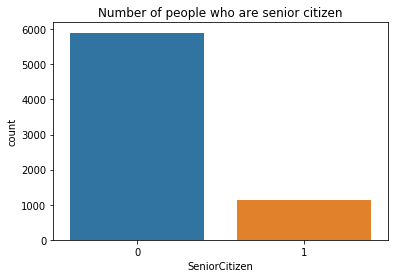

In [34]:
sns.countplot(telco.SeniorCitizen)
plt.title("Number of people who are senior citizen")
plt.show()

In [33]:
telco.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

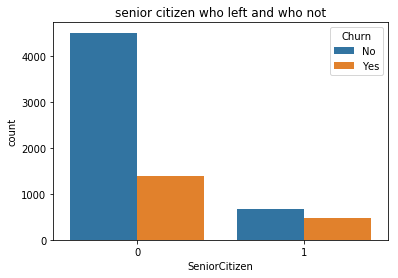

In [59]:
sns.countplot(telco.SeniorCitizen,hue=telco.Churn)
plt.title('senior citizen who left and who not')
plt.show()

In [49]:
senior_left =telco.query("SeniorCitizen == 1 and Churn == 'Yes'")

In [38]:
senior_left.shape

(476, 21)

In [39]:
print('the percentage of senior citizen who left is {}%'.format((476/1142)*100))

the percentage of senior citizen who left is 41.68126094570928%


### there is a problem!
**41.7% from senior citizen left the company; which it mean that the company didn't provide a suitable service to them**

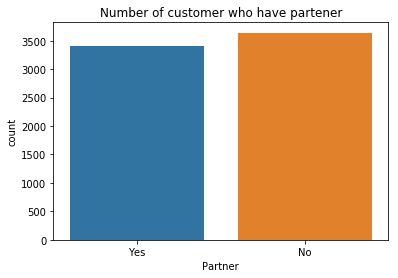

In [47]:
sns.countplot(telco.Partner)
plt.title("Number of customer who have partener")
plt.show()

In [46]:
telco.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

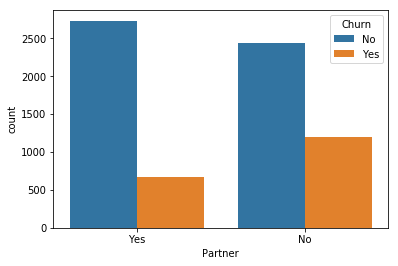

In [56]:
sns.countplot(telco.Partner,hue=telco.Churn)
plt.show()

In [50]:
partner_left = telco.query("Partner == 'Yes' and Churn == 'Yes'")

In [51]:
partner_left.shape

(669, 21)

In [53]:
telco.query("Partner == 'No' and Churn == 'Yes'").shape

(1200, 21)

In [54]:
print("there are {}% of customers who have partner left the company - and there are {}% of customers who din't have partner left"
     .format((669/3402)*100,(1200/3641)*100))

there are 19.66490299823633% of customers who have partner left the company - and there are 32.95797857731392% of customers who din't have partner left


# there is another problem: 33% of customers who don't have partner left the company.
**which it mean that; the company didn't provide a suitable service to them**

## let's discover the last kind of customer who is dependant and who is not

In [63]:
telco.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

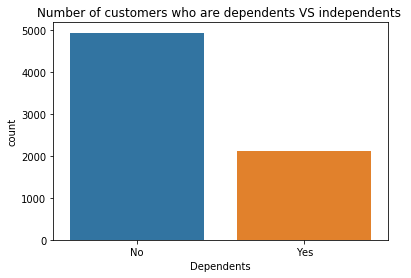

In [65]:
sns.countplot(telco.Dependents)
plt.title('Number of customers who are dependents VS independents')
plt.show()

**let's see who are left the company**

In [68]:
telco.query("Dependents == 'Yes' and Churn == 'Yes'").shape

(326, 21)

In [69]:
telco.query("Dependents == 'No' and Churn == 'Yes'").shape

(1543, 21)

In [71]:
print("there are {}% of customers who are Dependents left the company - and there are {}% of customers who are independents left"
     .format((326/2110)*100,(1543/4933)*100))

there are 15.450236966824646% of customers who are Dependents left the company - and there are 31.279140482465028% of customers who are independents left


### that is expected thing, the number of independents  customers who left the company is 31% which is greater than the number of dependent customer who left the company which is 15.4%, because they want to save money

# now we are put our hand on some  problems which are :

- 41.7% from senior citizen left the company.
- 33% of customers who don't have partner left the company.
- 31% of independent customers left the company


# It's time to find the reasons for those problems

In [76]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


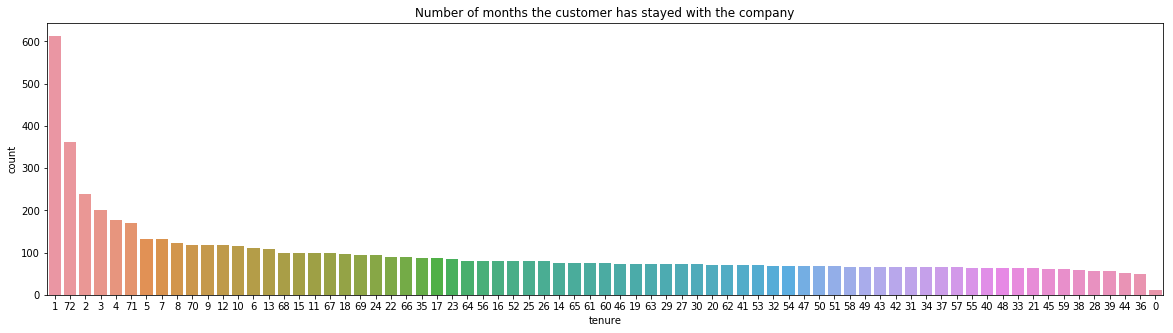

In [93]:
plt.figure(figsize=(20,5))
sns.countplot(telco.tenure,order=(telco.tenure.value_counts().index))
plt.title('Number of months the customer has stayed with the company')
plt.show()

In [100]:
print('there are {}% of customers left the company after the first month'.format((telco.query("tenure ==1").shape[0]/telco.shape[0])*100))

there are 8.70367741019452% of customers left the company after the first month


In [101]:
print('in general {}% of customers left the company after first 5 months'
      .format((telco.query("tenure ==[1,2,3,4,5]").shape[0]/telco.shape[0])*100))

in general 19.30995314496663% of customers left the company after first 5 months


# let's discover the service which the company provide

In [108]:
service = telco.iloc[:,6:-4]

In [109]:
service.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes


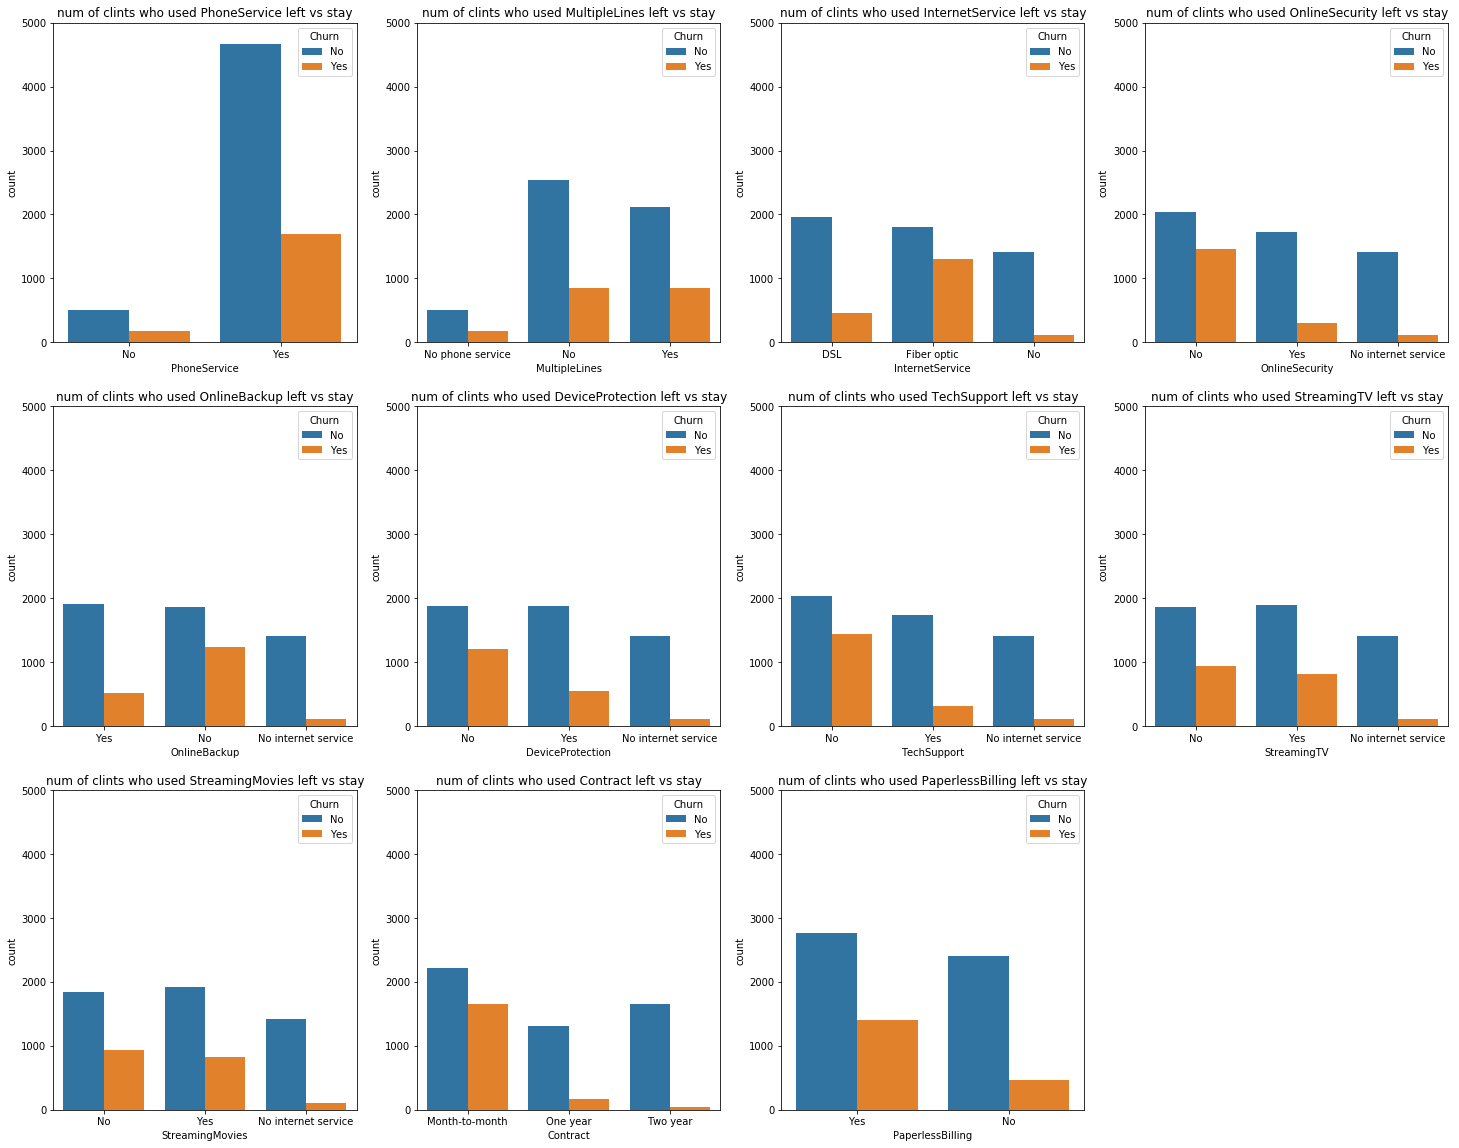

In [152]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.Churn,data=telco)
    plt.ylim(0,5000)
    plt.title('num of clints who used {} left vs stay'.format(feature))
plt.show()

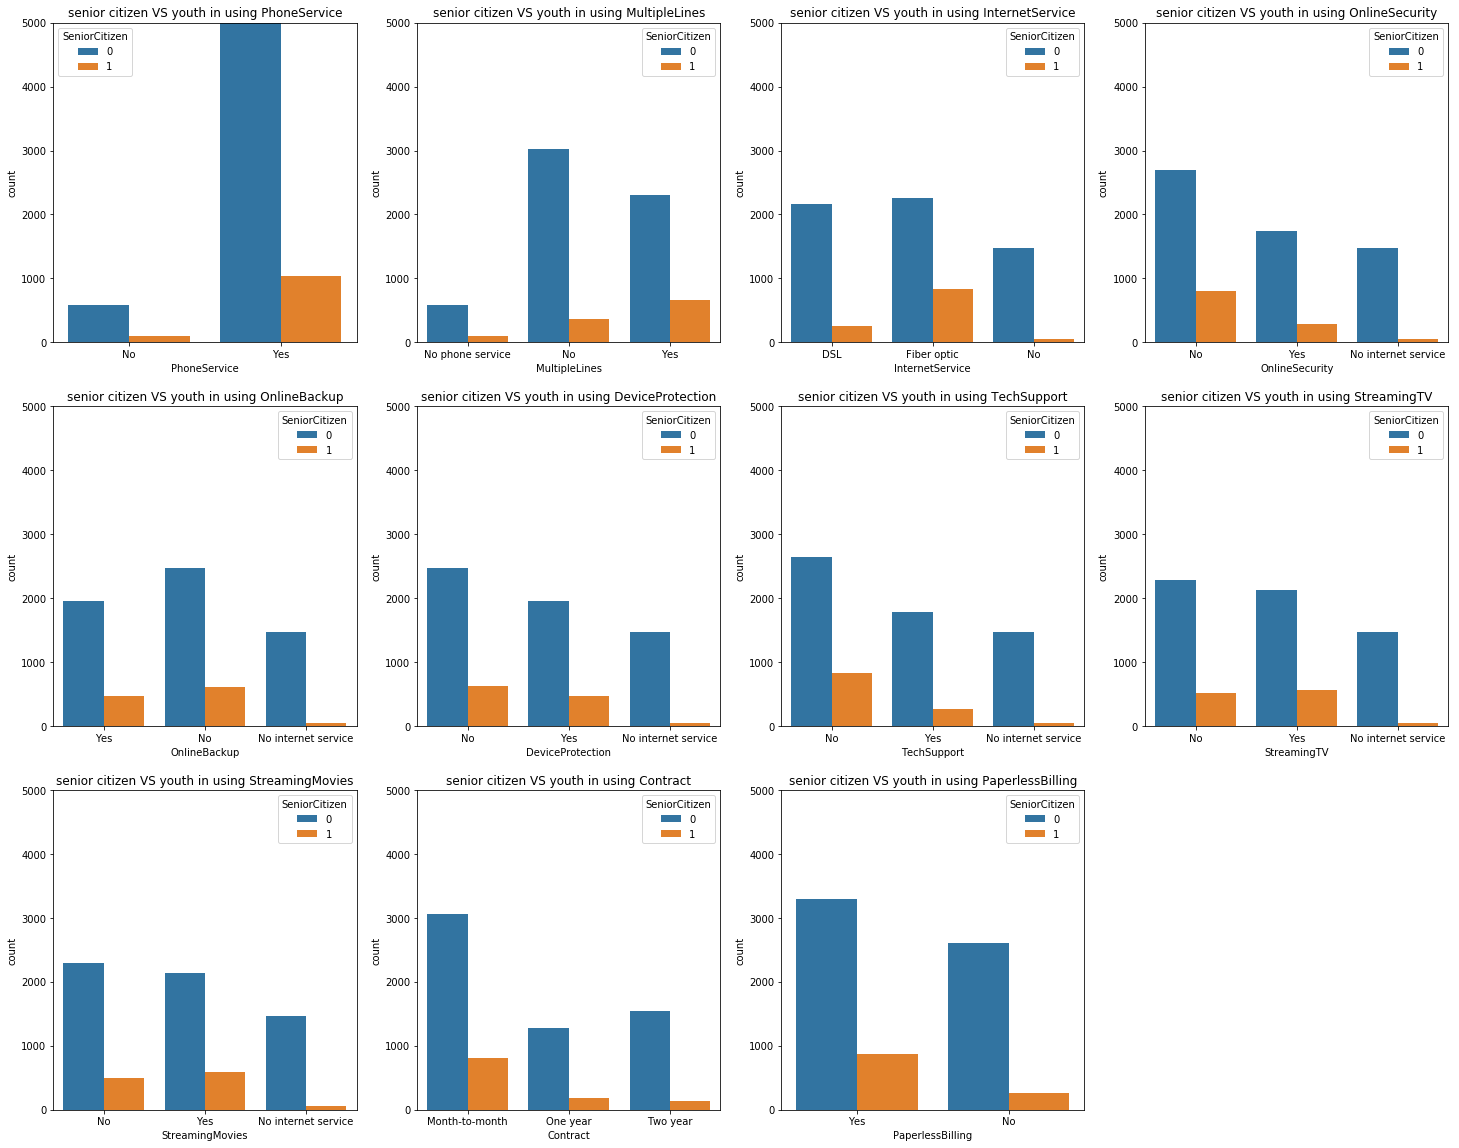

In [153]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.SeniorCitizen,data=telco)
    plt.ylim(0,5000)
    plt.title('senior citizen VS youth in using {}'.format(feature))
plt.show()

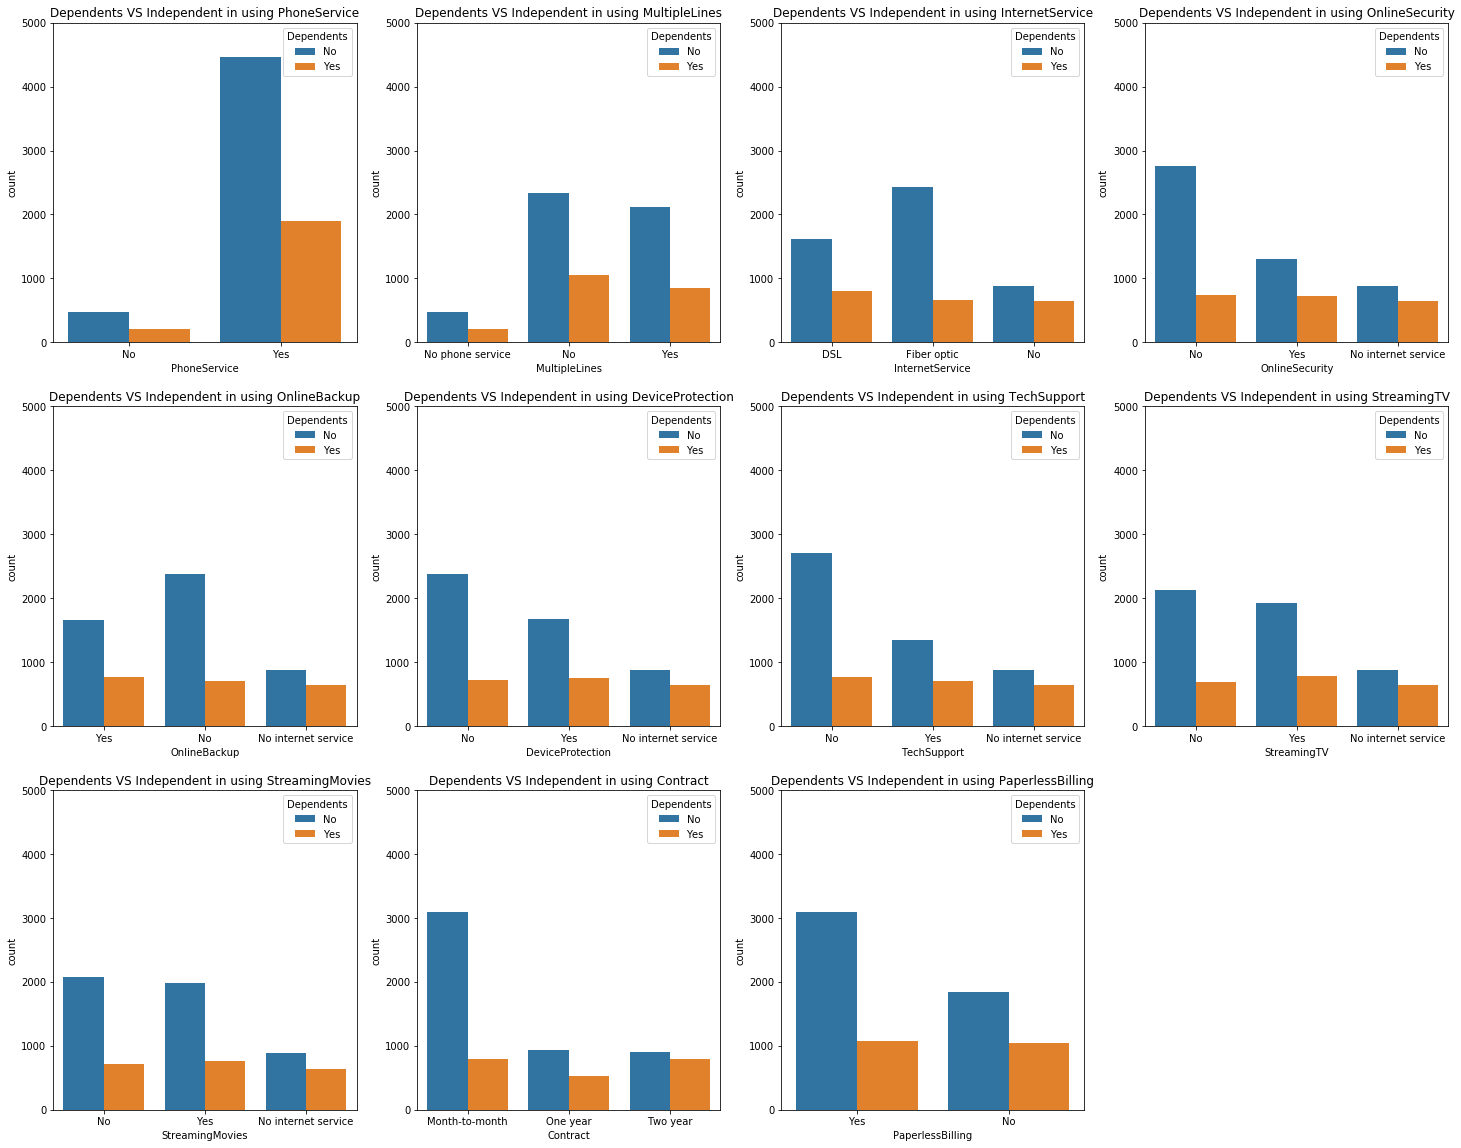

In [154]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.Dependents,data=telco)
    plt.ylim(0,5000)
    plt.title('Dependents VS Independent in using {}'.format(feature))
plt.show()

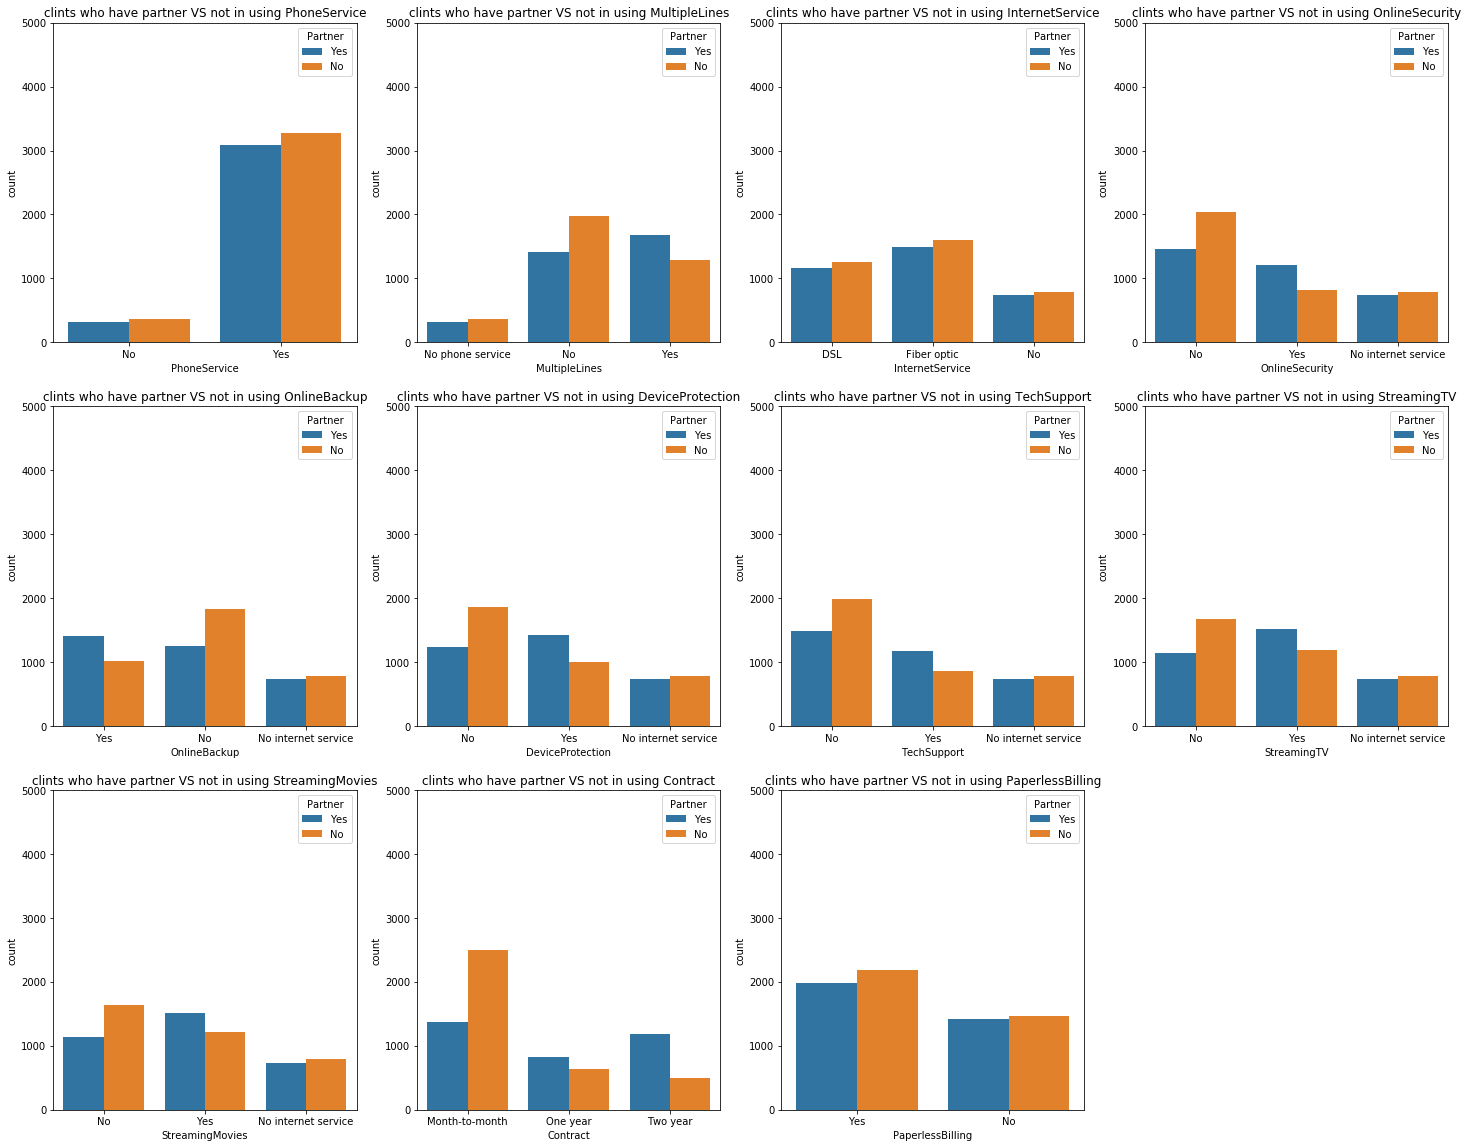

In [155]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.Partner,data=telco)
    plt.ylim(0,5000)
    plt.title('clints who have partner VS not in using {}'.format(feature))
plt.show()

In [149]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [162]:
num_col = telco[['tenure','MonthlyCharges','TotalCharges']]

In [170]:
num_col.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


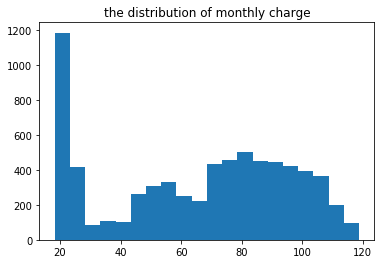

In [199]:
plt.hist((num_col.MonthlyCharges),bins=20)
plt.title('the distribution of monthly charge')
plt.show()

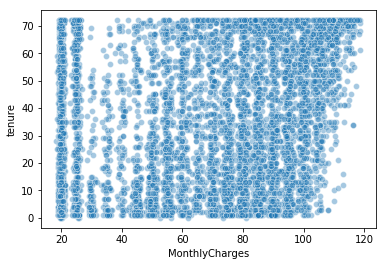

In [205]:
sns.scatterplot(y=num_col.tenure,x=num_col.MonthlyCharges,alpha=0.4)
plt.show()

<a id='conclusions'></a>
## Conclusions

## in the end there are some problems the company faces

- 41.7% of senior citizens left the company.
- 33% of customers who don't have a partner left the company.
- 31% of independent customers left the company
- 15.4% of dependent customers  left the company
- 8.7% of customers left the company after the first month
- 19.3% of customers left the company after first 5 months

- A large number of customers using Fiber Optic have left the company
- Clients who do not use online security, many of them leave the company
- Many clients who do not use technical support have left the company
- Customers who pay month to month are the most who leave the company